# Part 1
The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

Reading data set for normal patients

In [2]:
#Data setup
df = pd.read_csv("Part1 - Normal.csv")
df.sample(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
49,63.619192,16.934508,49.349262,46.684684,117.089747,-0.357812,Normal
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
77,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,Normal
91,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
25,63.929470,19.971097,40.177050,43.958373,113.065939,-11.058179,Nrmal
59,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425,Normal
37,49.828135,16.736435,28.000000,33.091700,121.435558,1.913307,Normal
76,61.734875,17.114312,46.900000,44.620563,120.920200,3.087726,Normal
52,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,Normal
88,66.507179,20.897672,31.727471,45.609507,128.902905,1.517203,Normal


Checking different types of classes

In [3]:
pd.unique(df['Class'])

array(['Normal', 'Nrmal'], dtype=object)

As Normal and Nrmal are same class with spelling difference
Replace nrmal with Normal

In [6]:
df.replace('Nrmal','Normal',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [7]:
df.shape

(100, 7)

In [8]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


Fetching H type patient data

In [10]:
#Data setup
df2 = pd.read_csv("Part1 - Type_H.csv")
df2.sample(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
54,41.171680,17.321206,33.469403,23.850474,116.377889,-9.569250,Type_H
21,54.919443,21.062332,42.200000,33.857110,125.212716,2.432561,Type_H
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Type_H
45,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
33,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,type_h
52,50.209670,29.760122,36.104007,20.449548,128.292515,5.740614,type_h
25,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,Type_H
12,48.915551,19.964556,40.263794,28.950995,119.321358,8.028895,Type_H
41,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476,type_h


Checking different types of classes

In [11]:
pd.unique(df2['Class'])

array(['Type_H', 'type_h'], dtype=object)

As Type_H and type_h are same class with spelling difference
Replace type_h with Type_H

In [12]:
df2.replace('type_h','Type_H',inplace=True)
pd.unique(df2['Class'])

array(['Type_H'], dtype=object)

In [13]:
df2.shape

(60, 7)

In [14]:
df2.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
std,10.697131,7.016708,9.767795,7.555388,9.355720,5.531177
min,26.147921,3.144669,14.000000,13.366931,84.241415,-10.675871
25%,41.018099,12.874329,29.038069,25.215275,112.280320,-0.910819
50%,46.416169,16.949285,35.164873,30.000659,116.696146,2.542441
75%,53.922329,22.002980,42.011563,34.962103,122.042999,6.059666
max,74.433593,41.557331,62.275275,46.613539,137.540613,15.779697


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


Fetching S type patient data

In [16]:
#Data setup
df3 = pd.read_csv("Part1 - Type_S.csv")
df3.sample(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
32,85.352315,15.844910,71.668660,69.507405,124.419787,76.020603,Type_S
58,65.536003,24.157487,45.775170,41.378515,136.440302,16.378086,Type_S
67,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,Type_S
9,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,Type_S
124,81.056611,20.801492,91.784495,60.255119,125.430176,38.181782,tp_s
17,58.782548,7.667044,53.338941,51.115504,98.501157,51.584125,Type_S
14,72.222334,23.077711,91.000000,49.144624,137.736655,56.804093,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
42,70.399308,13.469986,61.200000,56.929322,102.337524,25.538429,Type_S
117,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,Type_S


In [17]:
pd.unique(df3['Class'])

array(['Type_S', 'tp_s'], dtype=object)

In [18]:
df3.replace('tp_s','Type_S',inplace=True)
pd.unique(df3['Class'])

array(['Type_S'], dtype=object)

In [19]:
df3.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687
std,15.109337,11.506169,16.397068,12.318813,15.579995,40.108030
min,37.903910,-6.554948,24.710274,19.290046,70.082575,1.010041
25%,60.658136,13.461149,52.000000,43.166815,104.706761,30.393271
50%,72.149306,19.309548,62.555200,50.751695,114.842400,42.372509
75%,81.075893,29.229680,76.990924,56.675435,123.337307,61.894425
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [21]:
df3.shape

(150, 7)

Checking for null elements in all data sets

In [22]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [23]:
df2.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [24]:
df3.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

No null element found

In [25]:
# Setting class as category data type
df['Class'] = df.Class.astype('category')
df2['Class'] = df2.Class.astype('category')
df3['Class'] = df3.Class.astype('category')

In [26]:
frames=[df,df2,df3]
final=pd.concat(frames)

In [27]:
final.reset_index(inplace=True)
final.drop('index',axis=1,inplace=True)

In [28]:
final.sample(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048,Normal
75,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,Normal
187,44.914149,10.218996,44.630914,34.695154,130.075660,37.364540,Type_S
299,75.298478,16.671484,61.296204,58.626995,118.883388,31.575823,Type_S
198,77.655119,22.432950,93.892779,55.222169,123.055707,61.211187,Type_S
58,57.145851,16.489091,42.842148,40.656760,113.806178,5.015186,Normal
150,55.285852,20.440118,34.000000,34.845733,115.877017,3.558372,Type_H
200,84.585607,30.361685,65.479486,54.223922,108.010218,25.118478,Type_S
168,72.076278,18.946176,51.000000,53.130102,114.213013,1.010041,Type_S
234,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134,Type_S


In [29]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [30]:
final['Class'] = final.Class.astype('category')

## Data Analysis and Visualization


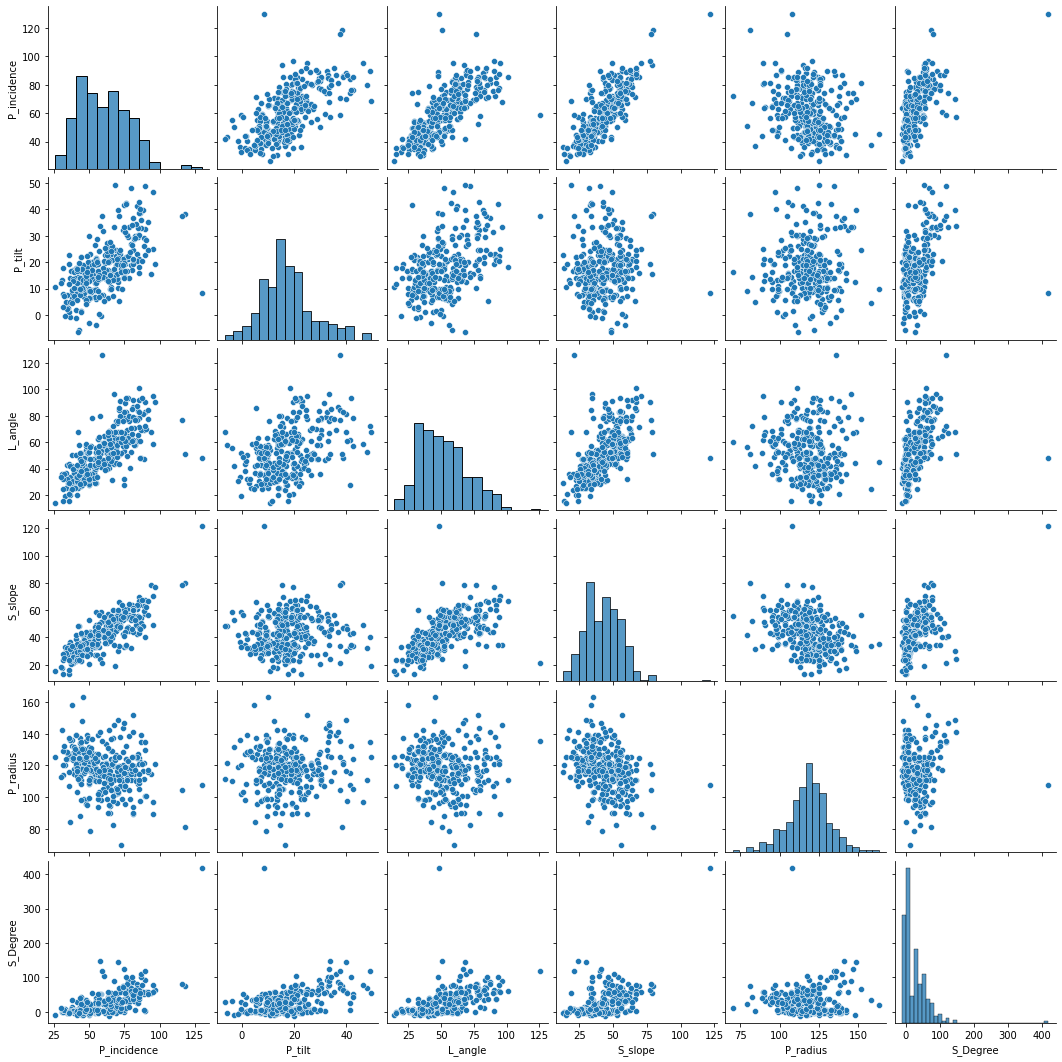

In [31]:
sns.pairplot(final[['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']])

In [34]:
final.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Outliers are present in S-Degree data of final data set which can be inferred from difference between its mean and median and also from histogram 

Comparison between different attributes and class

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


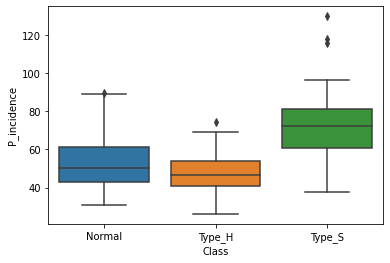

In [36]:
sns.boxplot(final['Class'],final['P_incidence']);

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


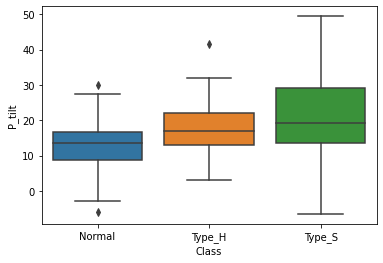

In [37]:
sns.boxplot(final['Class'],final['P_tilt']);

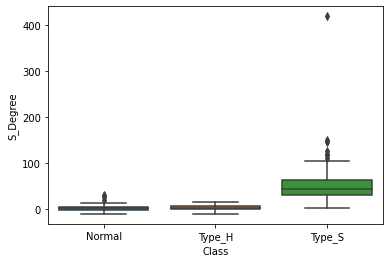

In [38]:
sns.boxplot(x=final['Class'],y=final['S_Degree']);

removing outlier from df3 data set

In [40]:
final=final[final['S_Degree']<360]
final.shape

(309, 7)

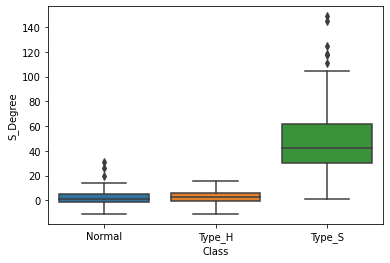

In [41]:
sns.boxplot(x=final['Class'],y=final['S_Degree']);

Segregate predictors vs target attributes

In [36]:
X = final.drop(labels= "Class" , axis = 1)
y = final["Class"]
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


<AxesSubplot:xlabel='Class', ylabel='count'>

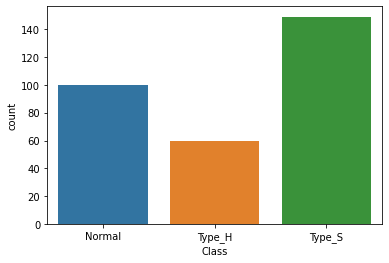

In [37]:
sns.countplot(x='Class',data=final)

In [38]:
from collections import Counter
Counter(y)

Counter({'Normal': 100, 'Type_H': 60, 'Type_S': 149})

Found imbalance in Target Variable. 
It will affect accuracy of model

In [39]:
from imblearn.combine import SMOTETomek

smk=SMOTETomek()


In [40]:
X,y= smk.fit_resample(X,y)

In [41]:
y

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
432    Type_H
433    Type_H
434    Type_H
435    Type_H
436    Type_H
Name: Class, Length: 437, dtype: category
Categories (3, object): ['Normal', 'Type_H', 'Type_S']

In [42]:
from collections import Counter
Counter(y)

Counter({'Normal': 144, 'Type_H': 148, 'Type_S': 145})

Removed imbalance


Normalizing

In [43]:
#  convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02
mean,5.121761e-16,-1.246143e-16,2.151851e-16,-4.608569e-16,-2.076905e-16,9.654113e-18
std,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00
min,-1.966445e+00,-2.600781e+00,-1.907836e+00,-2.218890e+00,-3.972582e+00,-1.060378e+00
25%,-7.301828e-01,-6.993249e-01,-7.035255e-01,-6.656679e-01,-5.011700e-01,-6.376561e-01
50%,-2.213179e-01,-9.727287e-02,-2.185175e-01,-1.844052e-01,1.136318e-02,-4.621458e-01
75%,6.658025e-01,4.796678e-01,6.154818e-01,6.893541e-01,5.519039e-01,4.505639e-01
max,3.887717e+00,3.549019e+00,4.500382e+00,3.322121e+00,3.700465e+00,4.734726e+00


In [44]:
#  Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

# Build kNN Model

In [45]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [46]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

# Evaluate Performance of kNN Model

In [47]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9090909090909091

Confusion Matrix
[[35  5  2]
 [ 1 37  0]
 [ 2  2 48]]


<AxesSubplot:>

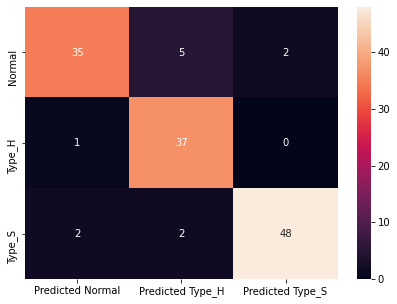

In [48]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_H","Type_S"])

print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H","Type_S"]],
                  columns = [i for i in ["Predicted Normal", "Predicted Type_H","Predicted Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Choosing the K-Value

In [49]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

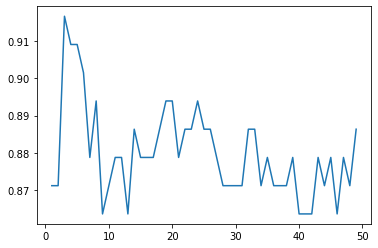

In [50]:
plt.plot(range(1,50),scores)

In [51]:
temp=scores.index(max(scores))
print('Max score occurs at k =',temp+1,'which is',max(scores))

Max score occurs at k = 3 which is 0.9166666666666666


# A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.




# Part 2

In [52]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats




In [53]:
#Data setup
cs = pd.read_csv("Part2 - Data1.csv")
cs.sample(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
2225,2226,54,24,25,90505,4,0.4,3
3079,3080,55,31,23,95616,2,0.3,1
4225,4226,43,18,204,91902,2,8.8,1
3466,3467,33,6,53,94122,2,1.0,2
3356,3357,49,23,115,95051,3,4.6,3
209,210,64,39,172,94707,4,3.1,1
3932,3933,26,2,55,94305,3,0.7,2
11,12,29,5,45,90277,3,0.1,2
3037,3038,27,2,158,95060,3,0.4,2
2974,2975,42,18,52,95008,4,1.9,1


In [54]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [55]:
cs.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64

In [56]:
cs.shape

(5000, 8)

In [57]:
#Data setup
cs2 = pd.read_csv("Part2 -Data2.csv")
cs2.sample(10)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
198,199,90,1,0,1,0,0.0
4099,4100,0,0,0,1,1,0.0
1160,1161,0,1,0,1,0,0.0
4171,4172,0,0,0,1,0,0.0
4629,4630,0,0,1,1,1,0.0
2846,2847,0,0,0,1,0,0.0
248,249,264,0,0,1,1,0.0
2784,2785,0,0,0,0,0,1.0
2456,2457,0,0,0,0,1,0.0
2012,2013,0,0,0,1,1,0.0


In [58]:
cs2.shape

(5000, 7)

In [59]:
cs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [60]:
cs2.isnull().sum()

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Filling Null values

In [61]:
cs2['LoanOnCard'].fillna(0,inplace=True)

In [62]:
cs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           5000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [63]:
# Removing ID column as it will repeat after merging dat1 and 2
cs2.drop(cs2.columns[0],axis=1,inplace=True)
cs2.sample(5)

,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
2596,0,0,0,0,0,0.0
3393,0,0,0,1,1,0.0
4480,0,0,0,1,0,1.0
1083,0,1,0,0,0,0.0
1009,140,0,0,1,0,0.0


In [64]:
# Merging two data frames
frames2=[cs,cs2]
final2=pd.concat(frames2,axis=1)
final2.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
1858,1859,35,11,65,90747,3,2.80,1,240,0,0,1,0,0.0
1446,1447,29,4,22,92661,2,0.90,3,110,0,0,0,0,0.0
4787,4788,48,22,42,95054,3,0.60,2,121,0,0,1,0,0.0
4544,4545,28,4,80,95819,3,2.50,1,0,0,0,1,0,0.0
1681,1682,32,8,141,90005,2,4.33,1,0,0,0,0,0,0.0


In [65]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [66]:
final2.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

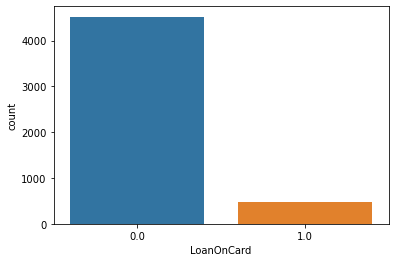

In [67]:
sns.countplot(x='LoanOnCard',data=final2)

/home/mumbaikar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage'>

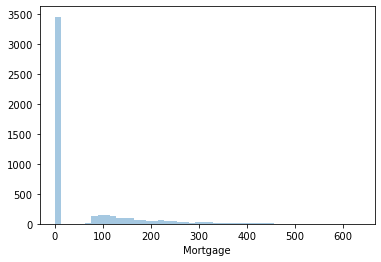

In [68]:
sns.distplot(final2['Mortgage'],kde=False)

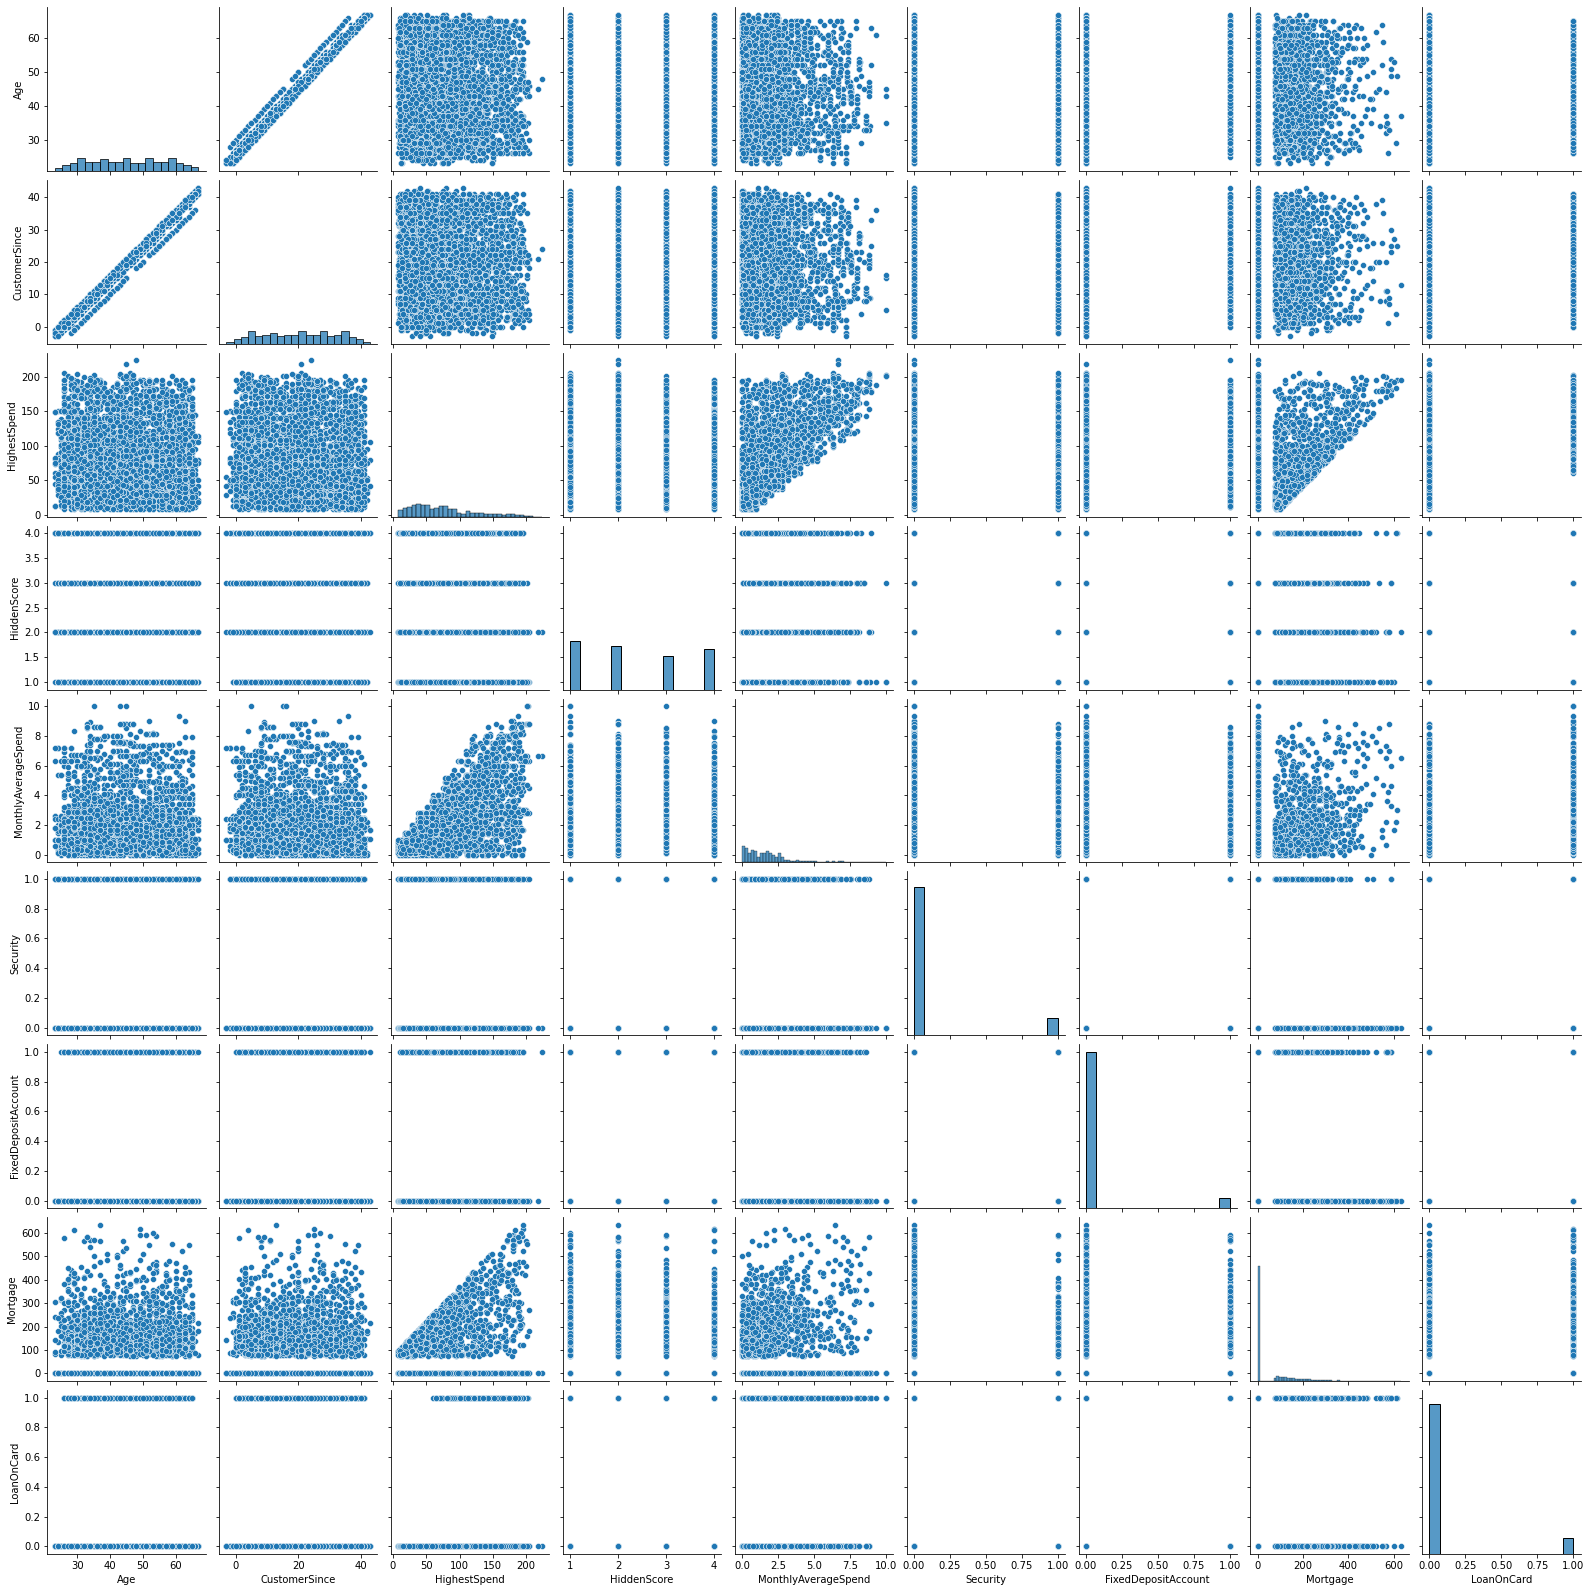

In [69]:
sns.pairplot(final2[['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend','Security','FixedDepositAccount','Mortgage','LoanOnCard']])

In [70]:
# converting LoanOnCard to int64 type
final2['LoanOnCard'] = final2.LoanOnCard.astype('int64')

In [71]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [72]:
# converting LoanOnCard to category type
final2['LoanOnCard'] = final2.LoanOnCard.astype('category')

In [73]:
pd.unique(final2['LoanOnCard'])

[0, 1]
Categories (2, int64): [0, 1]

Taking LoanOnCard as target variable

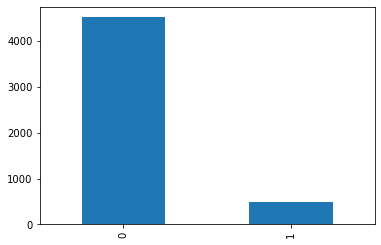

In [74]:
final2.LoanOnCard.value_counts().plot(kind = 'bar')
plt.show()

In [75]:
X = final2.drop(labels= "LoanOnCard" , axis = 1)
y = final2["LoanOnCard"]
X.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [76]:
from collections import Counter
Counter(y)

Counter({0: 4520, 1: 480})

Found Imbalance in target variable

In [77]:
from imblearn.combine import SMOTETomek

smk=SMOTETomek()


In [78]:
X,y= smk.fit_resample(X,y)

In [79]:
Counter(y)

Counter({0: 4440, 1: 4440})

Removed Imbalance in target variable



# Logistic Regression

In [80]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
5147,1028,29,4,109,92096,3,2.514856,2,0,0,0,0,0
639,655,54,29,129,93940,4,4.200000,3,0,0,0,0,0
1135,1161,28,1,40,95134,1,2.000000,2,0,1,0,1,0
5033,3472,56,32,163,92535,3,4.258918,1,0,0,0,1,0
125,128,34,8,82,92646,1,2.700000,2,251,0,0,1,0


In [81]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
print(x_train)
print(y_predict)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
5147  1028   29              4           109    92096            3   
639    655   54             29           129    93940            4   
1135  1161   28              1            40    95134            1   
5033  3472   56             32           163    92535            3   
125    128   34              8            82    92646            1   
...    ...  ...            ...           ...      ...          ...   
2895  2950   37             11            19    95054            3   
7813  2463   49             23           120    94675            3   
905    926   42             18            31    94720            1   
5192  2071   44             18           148    95099            2   
235    239   57             32            28    95831            3   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
5147             2.514856      2         0         0                    0   
639  

In [82]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9054054054054054


<AxesSubplot:>

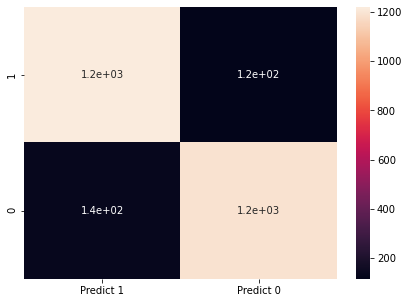

In [83]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Naive Bayes Classifier

In [84]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())
diab_model

GaussianNB()

In [85]:
diab_train_predict = diab_model.predict(x_train)
print(diab_train_predict)
from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

[1 1 0 ... 0 1 0]
Model Accuracy: 0.9065



In [86]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.8964



Confusion Matrix


<AxesSubplot:>

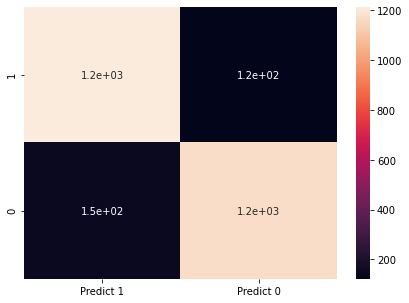

In [87]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [88]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.91      0.90      1336
           0       0.91      0.88      0.89      1328

    accuracy                           0.90      2664
   macro avg       0.90      0.90      0.90      2664
weighted avg       0.90      0.90      0.90      2664

